In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import re
import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
import src1.feature_extraction as fe
import src1.model_builder as mb
import src1.one_prediction as prediction
import src1.image_resize as resize
import pickle

In [5]:
train_list = fe.image_list('train_photos/')

Looking for images in 'kickflip'
Looking for images in 'ollie'


In [6]:
fe.extraction(train_list)

Processing train_photos/kickflip/color_images (1).jpg...
Processing train_photos/kickflip/color_new_IMG_1917.jpg...
Processing train_photos/kickflip/color_new_IMG_9144.jpg...
Processing train_photos/kickflip/color_new_IMG_9443.jpg...
Processing train_photos/kickflip/new_IMG_1890.jpg...
Processing train_photos/kickflip/new_IMG_9117.jpg...
Processing train_photos/kickflip/new_IMG_9416.jpg...
Processing train_photos/kickflip/rotate_new_IMG_1861.jpg...
Processing train_photos/kickflip/rotate_new_IMG_2163.jpg...
Processing train_photos/kickflip/rotate_new_IMG_9389.jpg...
Processing train_photos/ollie/color_new_IMG_1773.jpg...
Processing train_photos/ollie/color_new_IMG_9039.jpg...
Processing train_photos/ollie/images (23).jpg...
Processing train_photos/ollie/new_IMG_2016.jpg...
Processing train_photos/ollie/new_IMG_9287.jpg...
Processing train_photos/ollie/rotate_new_IMG_1763.jpg...
Processing train_photos/ollie/rotate_new_IMG_9029.jpg...
Extraction is completed. Please train the model now!

In [8]:
with open('pickle_files/features.pkl', 'rb') as f:
    features = pickle.load(f)
with open('pickle_files/labels.pkl', 'rb') as l:
    labels = pickle.load(l)

In [14]:
mb.train_svm_classifer(features,labels)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] C=1, kernel=linear ..............................................
[CV] ............... C=1, kernel=linear, score=0.867647, total=  50.5s
[CV] C=1, kernel=linear ..............................................
[CV] ............... C=1, kernel=linear, score=0.886029, total=  50.4s
[CV] C=1, kernel=linear ..............................................
[CV] ............... C=1, kernel=linear, score=0.897059, total=  51.1s
[CV] C=1, kernel=linear ..............................................
[CV] ............... C=1, kernel=linear, score=0.889706, total=  51.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............... C=1, kernel=linear, score=0.893382, total=  49.8s
[CV] C=1, kern

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  5.8min


[CV] ............. C=100, kernel=linear, score=0.893382, total=  49.4s
[CV] C=100, kernel=linear ............................................
[CV] ............. C=100, kernel=linear, score=0.911765, total=  49.3s
[CV] C=100, kernel=linear ............................................
[CV] ............. C=100, kernel=linear, score=0.885609, total=  48.2s
[CV] C=1000, kernel=linear ...........................................
[CV] ............. C=100, kernel=linear, score=0.948529, total=  49.9s
[CV] C=1000, kernel=linear ...........................................
[CV] ............. C=100, kernel=linear, score=0.881919, total= 1.1min
[CV] C=1000, kernel=linear ...........................................
[CV] ............. C=100, kernel=linear, score=0.874074, total= 1.1min
[CV] C=1000, kernel=linear ...........................................
[CV] ............ C=1000, kernel=linear, score=0.867647, total= 1.1min
[CV] C=1000, kernel=linear ...........................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.941176, total= 1.6min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.911765, total= 1.6min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.908088, total= 1.7min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.955882, total= 1.7min
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.941176, total= 1.7min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ..... C=10, gamma=0.01, kernel=rbf, score=0.922509, total= 1.7min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .... C=10, gamma=0.001, kernel=rbf, score=0.893382, total= 1.2min
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 46.4min


[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.915441, total= 1.5min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.941176, total= 1.5min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.941176, total= 1.5min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.911765, total= 1.5min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.908088, total= 1.4min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.955882, total= 1.4min
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.941176, total= 1.4min
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=rbf, score=0.907749, total=  53.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .. C=1000, gamma=0.001, kernel=rbf, score=0.911111, total=  53.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] . C=1000, gamma=0.0001, kernel=rbf, score=0.900735, total=  59.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] . C=1000, gamma=0.0001, kernel=rbf, score=0.875000, total= 1.0min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] . C=1000, gamma=0.0001, kernel=rbf, score=0.900735, total=  53.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] . C=1000, gamma=0.0001, kernel=rbf, score=0.897059, total=  53.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] . C=1000, gamma=0.0001, kernel=rbf, score=0.904412, total= 1.1min
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 80.2min finished



The Best Parameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Classification report:
             precision    recall  f1-score   support

   kickflip       0.93      0.98      0.95       382
      ollie       0.97      0.90      0.94       298

avg / total       0.95      0.95      0.95       680



Processing project_photos/one_prediction/predicted.jpg...

Your prediction...
['kickflip'] [[ 0.46534464  0.53465536]]


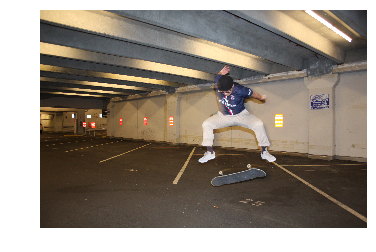

In [25]:
prediction.predict_one('Capstone_photo/kickflip_test/IMG_8985.JPG')